# Exploratory Data Analysis on Covid-19 dataset


As part of my course project on Data Analysis with Python, I had to first find a real-world dataset and perform an exploratory data analysis on it. Without much thought, I decided to work on the most trending topic in today's world - Covid-19.
I downloaded the latest dataset on Covid-19 from https://ourworldindata.org/coronavirus-source-data which gave a complete list of information for all the countries starting from February 24, 2020. Similarly, I downloaded another dataset from https://www.kaggle.com/fernandol/countries-of-the-world. This dataset contained other basic information of the countries(not covid related). I wanted to merge certain columns from both these datasets for my analysis.

For this project, I have used Pandas, matplotlib and Seaborn.

Pandas is a python library that contains data structures and data manipulation tools. It is used for working with tabular or heterogeneous data. Similarly, Matplotlib is a python plotting library which is designed for basic plotting(bars, lines, scatter plots, etc). Seaborn provides a variety of visualization patterns and uses fewer syntax. It is used in statistics visualization to summarize the data in visualizations or to show the distribution.

In [31]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation and Cleaning:

Let me first load the required datasets into a panda dataframe:

In [32]:
#Loading data from the first csv file into a dataframe
covid_data_df = pd.read_csv('./covid-data.csv')
covid_data_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94637,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94638,ZWE,Africa,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94639,ZWE,Africa,Zimbabwe,2021-06-07,39238.0,49.0,39.571,1611.0,5.0,2.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
94640,ZWE,Africa,Zimbabwe,2021-06-08,39321.0,83.0,46.143,1617.0,6.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [33]:
#Loading data from the next csv file into another dataframe
countries_data_df = pd.read_csv('./countries-of-the-world.csv')
countries_data_df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2,41.00,19.93,0.220,0.290,0.489


This is followed by cleaning the dataset. This process involves handling missing and invalid data, grouping by certain columns, selecting required columns, and finally merging the datasets to get a finalized dataframe.


##### For first Dataset:

In [34]:
covid_data_df = covid_data_df.rename(columns = {'location' :'Country'}, inplace = False) #renaming the column 'location' to 'Country'

#creating a dataframe with only the columns I require
new_covid_data_df = covid_data_df[['Country','date','continent', 'population', 'gdp_per_capita', 'life_expectancy', 'male_smokers', 'female_smokers' ]]


In [35]:
#Grouping all values by the 'Country' column, choosing the first value from its multiple rows and then reseting the index
new_covid_data_df= new_covid_data_df.groupby('Country').first().reset_index()

In [36]:
#Removing the rows that have na/none in 'continent' column
new_covid_data_df=new_covid_data_df[new_covid_data_df['continent'].notna()].reset_index()


In [37]:
#dropping the index column
new_covid_data_df= new_covid_data_df.drop('index', axis=1)

#dropping the date column
new_covid_data_df= new_covid_data_df.drop('date', axis=1)


In [38]:
#removing spaces at the beginning and at the end
new_covid_data_df['Country'] = new_covid_data_df['Country'].str.strip()


#### The first dataframe:

In [39]:
new_covid_data_df

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers
0,Afghanistan,Asia,38928341.0,1803.987,64.83,NaN,NaN
1,Albania,Europe,2877800.0,11803.431,78.57,51.2,7.1
2,Algeria,Africa,43851043.0,13913.839,76.88,30.4,0.7
3,Andorra,Europe,77265.0,NaN,83.73,37.8,29.0
4,Angola,Africa,32866268.0,5819.495,61.15,NaN,NaN
...,...,...,...,...,...,...,...
215,Vietnam,Asia,97338583.0,6171.884,75.40,45.9,1.0
216,Wallis and Futuna,Oceania,11246.0,NaN,79.94,NaN,NaN
217,Yemen,Asia,29825968.0,1479.147,66.12,29.2,7.6
218,Zambia,Africa,18383956.0,3689.251,63.89,24.7,3.1


#### For second dataset:

In [40]:
#creating a dataframe with only the required columns
new_countries_data_df = countries_data_df[['Country', 'Region', 'Net migration', 'Literacy (%)']]


In [41]:
new_countries_data_df['Country'] = new_countries_data_df['Country'].str.strip()


<ipython-input-41-616a771263d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_countries_data_df['Country'] = new_countries_data_df['Country'].str.strip()


#### The second dataframe:

In [42]:
new_countries_data_df

,Country,Region,Net migration,Literacy (%)
0,Afghanistan,ASIA (EX. NEAR EAST),23.06,36.0
1,Albania,EASTERN EUROPE,-4.93,86.5
2,Algeria,NORTHERN AFRICA,-0.39,70.0
3,American Samoa,OCEANIA,-20.71,97.0
4,Andorra,WESTERN EUROPE,6.60,100.0
...,...,...,...,...
222,West Bank,NEAR EAST,2.98,NaN
223,Western Sahara,NORTHERN AFRICA,NaN,NaN
224,Yemen,NEAR EAST,0.00,50.2
225,Zambia,SUB-SAHARAN AFRICA,0.00,80.6


Looks like the second dataframe does not need any further cleaning, so moving on to the next step.

I'm now creating a new dataframe to calculate the cumulative number for all the countries which I will be using later. We can see that the initial dataset of covid contains the information about the countries on each date starting from 22nd Feb, 2020 to 9th June 2021, where the number on 9th June gives the latest data. Let's call it third dataframe.

In [43]:
total_covid_data_df = covid_data_df.groupby('Country').last() 

#### Data cleaning:

In [44]:
#removing rows that have 0 life expectancy

total_covid_data_df = total_covid_data_df[total_covid_data_df['life_expectancy'] !=0].reset_index() 


In [45]:
#creating a df with only the required columns

new_total_covid_data_df = total_covid_data_df[['Country','hospital_beds_per_thousand','total_cases', 'total_deaths', 'total_tests']]


#### The third dataframe:

In [46]:
new_total_covid_data_df

,Country,hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,Afghanistan,0.500,84050.0,3305.0,NaN
1,Africa,NaN,4962319.0,133360.0,NaN
2,Albania,2.890,132415.0,2452.0,718515.0
3,Algeria,1.900,132034.0,3544.0,NaN
4,Andorra,NaN,13791.0,127.0,191856.0
...,...,...,...,...,...
224,Wallis and Futuna,NaN,NaN,NaN,NaN
225,World,2.705,174327080.0,3755614.0,NaN
226,Yemen,0.700,6832.0,1337.0,NaN
227,Zambia,2.000,103763.0,1324.0,1596883.0


Now, I merge the three dataframes to get my finalized dataframe:

In [47]:
#merging first and second dfs:
first_second = new_covid_data_df.merge(new_countries_data_df, on='Country')


In [48]:
#merging the result with the third dataframe:
my_df = first_second.merge(new_total_covid_data_df, on = 'Country')

## My finalized dataframe:

In [49]:
my_df

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,38928341.0,1803.987,64.83,NaN,NaN,ASIA (EX. NEAR EAST),23.06,36.0,0.50,84050.0,3305.0,NaN
1,Albania,Europe,2877800.0,11803.431,78.57,51.2,7.1,EASTERN EUROPE,-4.93,86.5,2.89,132415.0,2452.0,718515.0
2,Algeria,Africa,43851043.0,13913.839,76.88,30.4,0.7,NORTHERN AFRICA,-0.39,70.0,1.90,132034.0,3544.0,NaN
3,Andorra,Europe,77265.0,NaN,83.73,37.8,29.0,WESTERN EUROPE,6.60,100.0,NaN,13791.0,127.0,191856.0
4,Angola,Africa,32866268.0,5819.495,61.15,NaN,NaN,SUB-SAHARAN AFRICA,0.00,42.0,NaN,36115.0,811.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Vietnam,Asia,97338583.0,6171.884,75.40,45.9,1.0,ASIA (EX. NEAR EAST),-0.45,90.3,2.60,9635.0,55.0,4300036.0
185,Wallis and Futuna,Oceania,11246.0,NaN,79.94,NaN,NaN,OCEANIA,NaN,50.0,NaN,NaN,NaN,NaN
186,Yemen,Asia,29825968.0,1479.147,66.12,29.2,7.6,NEAR EAST,0.00,50.2,0.70,6832.0,1337.0,NaN
187,Zambia,Africa,18383956.0,3689.251,63.89,24.7,3.1,SUB-SAHARAN AFRICA,0.00,80.6,2.00,103763.0,1324.0,1596883.0


Now lets find some details about our dataframe:

In [50]:
my_df.shape #gives the shape(rows and columns) of the df

(189, 14)

In [51]:
my_df.info() #gives the summary of the dataframe that includes index dtype and column dtypes, non-null values and memory usage.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     189 non-null    object 
 1   continent                   189 non-null    object 
 2   population                  189 non-null    float64
 3   gdp_per_capita              170 non-null    float64
 4   life_expectancy             187 non-null    float64
 5   male_smokers                133 non-null    float64
 6   female_smokers              135 non-null    float64
 7   Region                      189 non-null    object 
 8   Net migration               187 non-null    float64
 9   Literacy (%)                179 non-null    float64
 10  hospital_beds_per_thousand  155 non-null    float64
 11  total_cases                 170 non-null    float64
 12  total_deaths                165 non-null    float64
 13  total_tests                 114 non

In [52]:
my_df.describe() #gives the statistical details of the df like percentile, mean, std


,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests
count,1.890000e+02,170.000000,187.000000,133.000000,135.000000,187.000000,179.000000,155.000000,1.700000e+02,165.000000,1.140000e+02
mean,3.976781e+07,19357.051153,73.423369,32.376692,10.676296,0.201283,81.996089,2.958948,1.007963e+06,22393.284848,2.001256e+07
std,1.497982e+08,20264.258122,7.435323,13.253381,10.507582,4.437136,20.297806,2.408553,3.713711e+06,71620.705867,5.948609e+07
min,4.999000e+03,702.225000,54.240000,7.700000,0.100000,-13.920000,17.600000,0.100000,2.000000e+00,1.000000,4.795400e+04
25%,1.271767e+06,3924.303000,68.280000,21.600000,1.900000,-0.850000,69.650000,1.300000,1.362000e+04,289.000000,1.227141e+06
50%,8.278737e+06,12595.255500,74.620000,31.400000,6.400000,0.000000,92.300000,2.300000,1.178195e+05,1806.000000,4.096366e+06
75%,2.769102e+07,27114.374750,78.830000,41.100000,19.200000,0.905000,98.000000,3.920000,4.594252e+05,10278.000000,1.203949e+07
max,1.439324e+09,116935.600000,86.750000,76.100000,43.000000,23.060000,100.000000,13.800000,3.341402e+07,598764.000000,4.519111e+08


From the above computations, we get a lot of ideas and information about our dataframe. For eg: Our dataframe consists of 189 countries, grouped across 14 different categories. Most of the columns are of float datatype. Similarly, we get the statistics as well. For eg: the mean value of total cases for all the countries is 1007963 and it's standard deviation is 3713711. The standard deviation is spread very higher than the mean total cases which means that the changes in the cases are very unpredictable.
    

Similarly, making some other calculations:

In [53]:
#Calculating average life expectancy using weighted average formula:

prod_le_df = my_df['population']*my_df['life_expectancy']
avg_le = prod_le_df.sum()/my_df['population'].sum()
print("\n The average life expectancy of the countries is {:.2f} ".format(avg_le))


 The average life expectancy of the countries is 72.88 


In [55]:
print("The sum total of all the reported cases upto June 9th, 2021 is {}, out of which {} people have died. The total tests conducted is {}".format(my_df['total_cases'].sum(), my_df['total_deaths'].sum(), my_df['total_tests'].sum()))


The sum total of all the reported cases upto June 9th, 2021 is 171353746.0, out of which 3694892.0 people have died. The total tests conducted is 2281432127.0


In [56]:
#locating the country with the highest deaths and cases:

chc = my_df.loc[my_df['total_cases']==my_df['total_cases'].max(), 'Country'].item()
chd = my_df.loc[my_df['total_deaths']==my_df['total_deaths'].max(), 'Country'].item()

print("The country with the highest number of cases is {} with {} cases, and that with the highest number of deaths is {} with {} deaths".format(chc, my_df['total_cases'].max(), chd, my_df['total_deaths'].max()))

The country with the highest number of cases is United States with 33414025.0 cases, and that with the highest number of deaths is United States with 598764.0 deaths


Since both the highest cases and the highest deaths are from the United States, it is the most affected country from the pandemic.

#### Now, plotting different graphs:

In [58]:
#configuring some styles first:

sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize'] = (11,7)
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.facecolor'] = '#0f0f0f80'

In [59]:
my_df_cont = my_df.groupby('continent')[['total_cases', 'total_deaths', 'total_tests', 'population']].sum().reset_index()

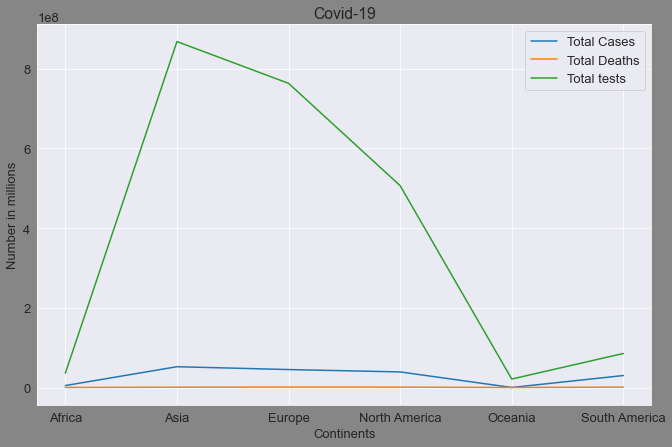

In [61]:
#plotting a line chart to compare total tests, deaths and cases across the continents

plt.plot(my_df_cont['continent'], my_df_cont['total_cases'])
plt.plot(my_df_cont['continent'], my_df_cont['total_deaths'])
plt.plot(my_df_cont['continent'], my_df_cont['total_tests'])

plt.xlabel('Continents')
plt.ylabel('Number in millions')
plt.title('Covid-19')
plt.legend(['Total Cases', 'Total Deaths', 'Total tests'])

From the graph, we can note that the most number of tests have been done in Asia, and the least in Oceania. Similarly, the highest number of cases are again from Asia, and the lowest from Oceania.
But it seems we cannot determine the same for total deaths as the line is somewhat straight. So, lets try to use a barplot to show the total deaths across the continents.

c:\users\beeka\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='continent', ylabel='total_deaths'>

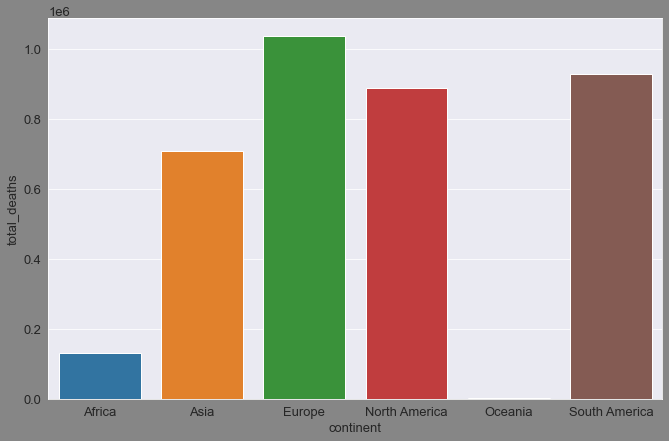

In [62]:
sns.barplot('continent', 'total_deaths', data= my_df_cont)

From the barplot, it is clear that the total deaths is the highest in Europe, and the lowest in Oceania. Hence, Oceania seems to be the least affected continent from all aspects.

Using a scatterplot from the Seaborn library to plot the total cases and the total population of the continents:

c:\users\beeka\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


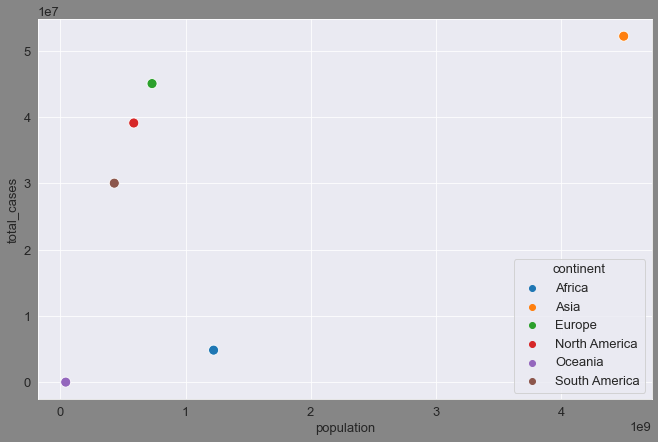

In [67]:
sns.scatterplot(my_df_cont.population, # X-axis
                my_df_cont.total_cases,  # Y-axis
                hue=my_df_cont.continent,  # Dot color
                s=100);

<AxesSubplot:ylabel='Country'>

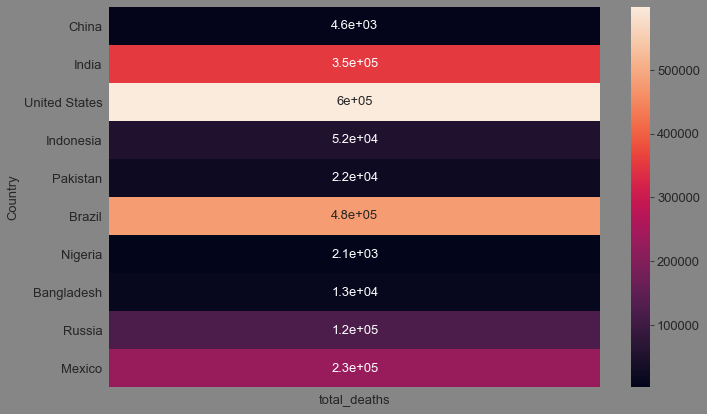

In [68]:
#grouping by country, sorting the column by population in descending order and creaitng df of top 10 countries
my_df_2 = my_df.groupby('Country').first().sort_values('population', ascending=False).head(10)

#using only the total deaths column
my_df_2 = my_df_2[['total_deaths']]

#plotting it in a heatmap
sns.heatmap(my_df_2, annot=True)


So, among the top 10 countries with the highest population, China has the least number of deaths, and USA has the highest.

#### Multiple Plotting:

<AxesSubplot:title={'center':'Bar Plot'}, xlabel='Country', ylabel='total_tests'>

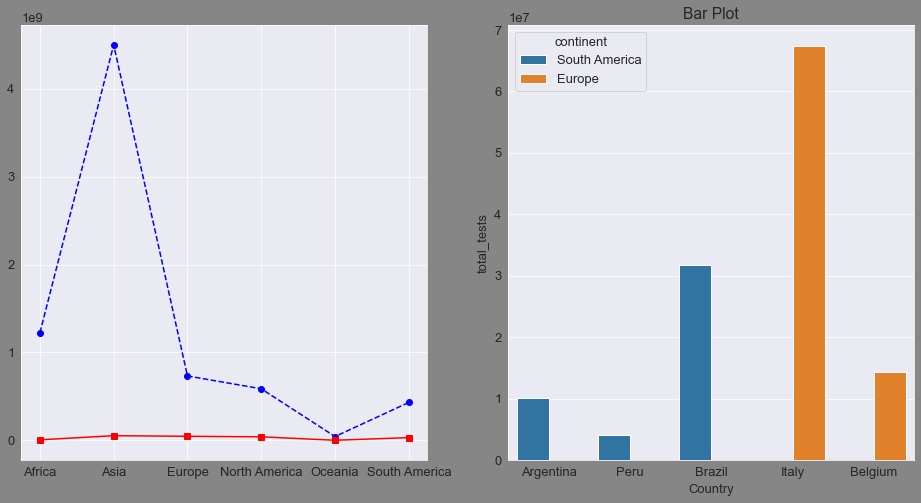

In [72]:
fig, axes = plt.subplots(1,2, figsize= (16,8))

#For axes(0)
axes[0].plot(my_df_cont['continent'], my_df_cont['population'], 'o--b')
axes[0].plot(my_df_cont['continent'], my_df_cont['total_cases'], 's-r')

plt.xlabel('Continents')
plt.ylabel('Number in millions')
plt.title('Population vs Total Cases')
plt.legend(['Population', 'Total Cases'])

#For axes(1)
#10 random countries from 25 countries with the highest death rate
my_df_3 = my_df.sort_values('total_deaths', ascending = False).head(25).sample(10) 
axes[1].set_title('Bar Plot')
sns.barplot(x='Country', y='total_tests', hue='continent', data= my_df_3.sample(5), ax=axes[1])

### Now it's time to take our analysis to the next step. Lets ask some questions about our data and answer them using visualizations and calculations.

#### 1.  How  many countries are there that have the least hospital_beds_per_thousand also fall in the group of countries with highest cases per thousand?(Top 50)

#### 2. How  many countries are there that have the least hospital_beds_per_thousand also fall in the group of countries with highest deaths per thousand?(Top 50)

#### 3. How  many countries are there that have the least hospital_beds_per_thousand also fall in the group of countries with lowest tests per thousand?(Top 50)



To answer these, lets start off by adding three new columns to our df: tests_per_thousand, deaths_per_thousand and cases_per_thousand:

In [73]:
my_df['cases_per_thousand'] = my_df['total_cases']*1e3 / my_df['population']
my_df['tests_per_thousand'] = my_df['total_tests']*1e3 / my_df['population']
my_df['deaths_per_thousand'] = my_df['total_deaths']*1e3 / my_df['population']

Now I'll create separate dataframes for: 50 countries with lowest hospital beds per thousand, 50 countries with highest cases per thousand, 50 countries with highest deaths per thousand, and 50 countries with lowest tests per thousand:

In [74]:

#50 countries with lowest hosp beds per thousand
my_df_hosp = my_df.sort_values(by = 'hospital_beds_per_thousand', ascending =True).head(50)

#50 countries with highest_cases per thousand

my_df_hc = my_df.sort_values(by = 'cases_per_thousand', ascending=False).head(50)

#50 countries with highest_deaths per thousand

my_df_hd = my_df.sort_values(by = 'deaths_per_thousand', ascending=False).head(50)

#50 countries with least tests per thousand

my_df_lt = my_df.sort_values(by = 'tests_per_thousand', ascending=False).head(50)




Finally, lets calculate the required counts:

In [76]:
#low hosp bed and highest cases
hosp_hc_count = my_df_hosp['Country'].isin(my_df_hc['Country']).value_counts()[True]
#similarly highest deaths
hosp_hd_count = my_df_hosp['Country'].isin(my_df_hd['Country']).value_counts()[True]
#similarly lowest test
hosp_lt_count = my_df_hosp['Country'].isin(my_df_lt['Country']).value_counts()[True]


print('There are {} countries that have the least hospital beds per thousand and also fall under the group of countries with the highest cases.'.format(hosp_hc_count))
print('\n Similarly, there are {} countries that have the least hospital beds per thousand and also fall under the group of countries with the highest deaths.'.format(hosp_hd_count))
print('\n And finally, there are {} countries that have the least hospital beds per thousand and also fall under the group of countries with the lowest tests.'.format(hosp_lt_count))



There are 4 countries that have the least hospital beds per thousand and also fall under the group of countries with the highest cases.

 Similarly, there are 5 countries that have the least hospital beds per thousand and also fall under the group of countries with the highest deaths.

 And finally, there are 3 countries that have the least hospital beds per thousand and also fall under the group of countries with the lowest tests.


#### 4. How many countries are there that have the highest number of smokers and also have the highest cases?


In [78]:
my_df['Total_smokers'] = my_df['male_smokers'] + my_df['female_smokers']

my_df_smk = my_df.sort_values(by = 'Total_smokers', ascending =False).head(50)

#highest smokers and highest cases
smk_hc_count = my_df_smk['Country'].isin(my_df_hc['Country']).value_counts()[True]

print('There are {} countries that have the most number of smokers and also fall under the countries with the highest number of cases.'.format(smk_hc_count))

There are 26 countries that have the most number of smokers and also fall under the countries with the highest number of cases.


#### 5. How many countries fall under the group of the highest number of smokers and also have the highest number of deaths?

In [79]:
# highest smokers and highest deaths
smk_hd_count = my_df_smk['Country'].isin(my_df_hd['Country']).value_counts()[True]

print('There are {} countries that have the most number of smokers and also fall under the countries with the highest number of deaths.'.format(smk_hd_count))

There are 27 countries that have the most number of smokers and also fall under the countries with the highest number of deaths.


From questions 4 and 5, we can note that more than half of the countries with the highest number of cases and the highest number of deaths also have the most number of smokers.

#### 6. Create a dataframe consisting of the 10 countries with the most number of cases.

In [82]:
mostcases_df = my_df.sort_values(by='total_cases', ascending= False).head(10)
mostcases_df

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests,cases_per_thousand,tests_per_thousand,deaths_per_thousand,Total_smokers
179,United States,North America,3.310026e+08,54225.446,78.86,24.6,19.1,NORTHERN AMERICA,3.41,97.0,2.77,33414025.0,598764.0,451911067.0,100.947909,1365.279315,1.808940,43.7
77,India,Asia,1.380004e+09,6426.674,69.66,20.6,1.9,ASIA (EX. NEAR EAST),-0.07,59.5,0.53,29089069.0,353528.0,364746522.0,21.078969,264.308234,0.256179,22.5
23,Brazil,South America,2.125594e+08,14103.452,75.88,17.9,10.1,LATIN AMER. & CARIB,-0.03,86.4,2.20,17122877.0,479515.0,31716527.0,80.555724,149.212529,2.255910,28.0
57,France,Europe,6.756425e+07,38605.671,82.66,35.6,30.1,WESTERN EUROPE,0.66,99.0,5.98,5787125.0,110364.0,NaN,85.653654,NaN,1.633467,65.7
172,Turkey,Asia,8.433907e+07,25129.341,77.69,41.1,14.1,NEAR EAST,0.00,86.5,2.81,5306690.0,48428.0,55673616.0,62.920900,660.116574,0.574206,55.2
140,Russia,Europe,1.459345e+08,24765.954,72.58,58.3,23.4,C.W. OF IND. STATES,1.02,99.6,8.05,5096657.0,122802.0,140875265.0,34.924287,965.332417,0.841487,81.7
178,United Kingdom,Europe,6.788600e+07,39753.244,81.32,24.7,20.0,WESTERN EUROPE,2.19,99.0,2.54,4551694.0,128124.0,185147729.0,67.049078,2727.332853,1.887340,44.7
84,Italy,Europe,6.046183e+07,35220.084,83.51,27.8,19.8,WESTERN EUROPE,2.07,98.6,3.18,4237790.0,126767.0,67412074.0,70.090339,1114.952628,2.096645,47.6
6,Argentina,South America,4.519578e+07,18933.907,76.67,27.7,16.2,LATIN AMER. & CARIB,0.61,97.1,5.00,4038528.0,83272.0,10156324.0,89.356313,224.718429,1.842473,43.9
61,Germany,Europe,8.378394e+07,45229.245,81.33,33.1,28.2,WESTERN EUROPE,2.18,99.0,8.00,3715870.0,89592.0,61311193.0,44.350621,731.777347,1.069322,61.3


#### 6. Create a dataframe consisting of the 10 countries with the most number of deaths.

In [85]:
mostdeaths_df=my_df.sort_values(by='total_deaths', ascending= False).head(10)
mostdeaths_df

,Country,continent,population,gdp_per_capita,life_expectancy,male_smokers,female_smokers,Region,Net migration,Literacy (%),hospital_beds_per_thousand,total_cases,total_deaths,total_tests,cases_per_thousand,tests_per_thousand,deaths_per_thousand,Total_smokers
179,United States,North America,3.310026e+08,54225.446,78.86,24.6,19.1,NORTHERN AMERICA,3.41,97.0,2.77,33414025.0,598764.0,451911067.0,100.947909,1365.279315,1.808940,43.7
23,Brazil,South America,2.125594e+08,14103.452,75.88,17.9,10.1,LATIN AMER. & CARIB,-0.03,86.4,2.20,17122877.0,479515.0,31716527.0,80.555724,149.212529,2.255910,28.0
77,India,Asia,1.380004e+09,6426.674,69.66,20.6,1.9,ASIA (EX. NEAR EAST),-0.07,59.5,0.53,29089069.0,353528.0,364746522.0,21.078969,264.308234,0.256179,22.5
112,Mexico,North America,1.289328e+08,17336.469,75.05,21.4,6.9,LATIN AMER. & CARIB,-4.87,92.2,1.38,2441866.0,229353.0,6701075.0,18.939067,51.973411,1.778858,28.3
134,Peru,South America,3.297185e+07,12236.706,76.74,NaN,4.8,LATIN AMER. & CARIB,-1.05,90.9,1.60,1987933.0,187157.0,4007521.0,60.291832,121.543726,5.676267,NaN
178,United Kingdom,Europe,6.788600e+07,39753.244,81.32,24.7,20.0,WESTERN EUROPE,2.19,99.0,2.54,4551694.0,128124.0,185147729.0,67.049078,2727.332853,1.887340,44.7
84,Italy,Europe,6.046183e+07,35220.084,83.51,27.8,19.8,WESTERN EUROPE,2.07,98.6,3.18,4237790.0,126767.0,67412074.0,70.090339,1114.952628,2.096645,47.6
140,Russia,Europe,1.459345e+08,24765.954,72.58,58.3,23.4,C.W. OF IND. STATES,1.02,99.6,8.05,5096657.0,122802.0,140875265.0,34.924287,965.332417,0.841487,81.7
57,France,Europe,6.756425e+07,38605.671,82.66,35.6,30.1,WESTERN EUROPE,0.66,99.0,5.98,5787125.0,110364.0,NaN,85.653654,NaN,1.633467,65.7
36,Colombia,South America,5.088288e+07,13254.949,77.29,13.5,4.7,LATIN AMER. & CARIB,-0.31,92.5,1.71,3633481.0,93394.0,17579550.0,71.408708,345.490440,1.835470,18.2


Creating a multiplot to plot these two values:


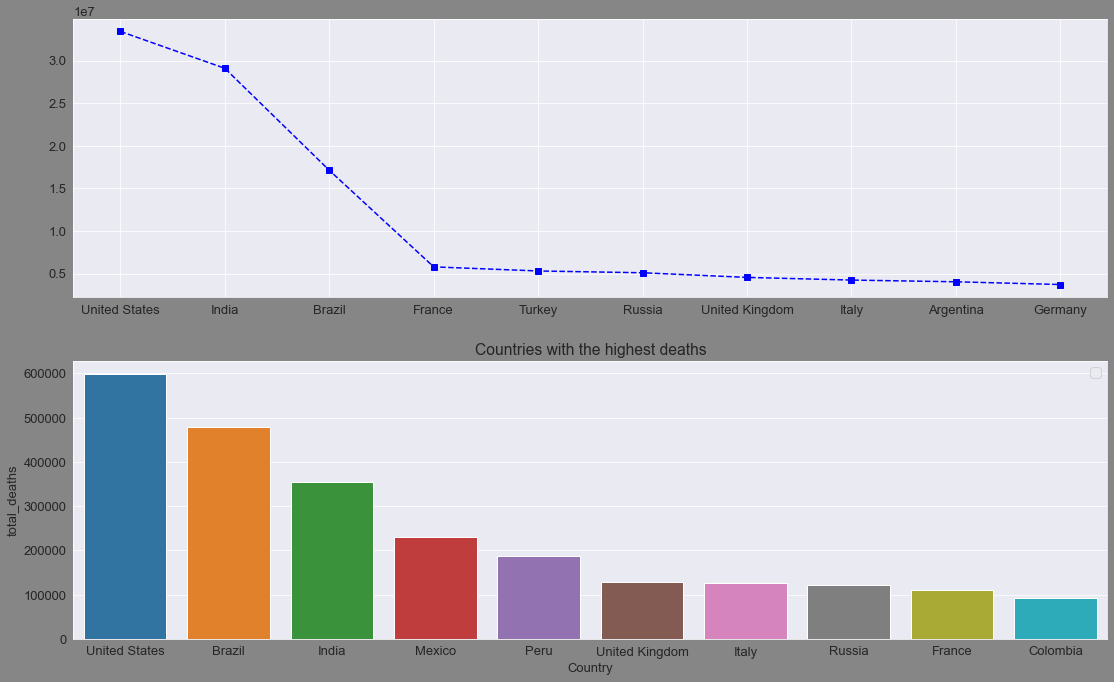

In [86]:
    

fig, axes = plt.subplots(2,1, figsize= (16,10))


axes[0].plot(mostcases_df['Country'], mostcases_df['total_cases'], 's--b')

plt.xlabel('Country')
plt.ylabel('Cases')
plt.title('Countries with the highest cases')
plt.legend(['Country', 'Total Cases'])



axes[1].set_title('Countries with the highest deaths')
sns.barplot(x='Country', y='total_deaths', data= mostdeaths_df, ax=axes[1])



plt.tight_layout(pad=2)

The graphs give us an even clearer idea about the respective countries.


My exploratory analysis of the covid dataset comes to an end with this. The analysis allowed me to explore my skills and apply all the tools & techniques I learned throughout the zerotopandas lessons. Needless to say, I have learned a lot from this project and the entire Data analysis course as a whole, and I can safely say that I feel more confident and comfortable working with data. This project has also given me a bunch of ideas of what one could do with data, and I'm very excited about my next steps! So, I want to conclude by thanking the instructor and the entire team of jovian for making this awesome course available to aspirants like us. I truly appreciate your efforts and the time you spent on this course.